In [2]:
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 MB 14.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 31.4 MB/s eta 0:00:0000:0100:01


In [3]:
import mne
import numpy as np
import os

# Define the path to the dataset and the output directory
gdf_dir = '/home/jovyan/BCICIV_2a_gdf'
output_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_finalvol2'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of subject files
subjects = ['A01T.gdf', 'A02T.gdf', 'A03T.gdf', 'A04T.gdf', 'A05T.gdf', 'A06T.gdf', 'A07T.gdf', 'A08T.gdf', 'A09T.gdf']

# Event IDs for the classes
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
tmin, tmax = 1.5, 6  # 4.5 seconds epochs starting at 1.5s

for subject in subjects:
    # Define the path to the subject's GDF file
    gdf_path = os.path.join(gdf_dir, subject)
    
    # Load the BCI-IV 2a dataset
    raw = mne.io.read_raw_gdf(gdf_path, preload=True)

    # Remove the last three channels (EOG-left, EOG-central, and EOG-right)
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

    # Extract epochs for each class using provided event IDs
    events, _ = mne.events_from_annotations(raw, event_id=event_id)

    # Creating epochs for each class
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True)
    data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)

    # Standardize each channel
    data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

    # Step 3: Save each epoch as a matrix of shape (22, 1125) in different subfolders
    for i, epoch_data in enumerate(data):
        # Adjust labels to start from 0 by subtracting 5 from each label
        label = epochs.events[i, -1] - 5
        # Create subfolder if it doesn't exist
        class_output_dir = os.path.join(output_dir, f'class_{label}')
        os.makedirs(class_output_dir, exist_ok=True)
        file_path = os.path.join(class_output_dir, f'{subject[:-4]}_epoch_{i+1}.npy')
        np.save(file_path, epoch_data)

    print(f'Saved {len(data)} epochs for {subject} to {output_dir}')

print("Processing complete for all subjects.")


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 287 epochs for A01T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 287 epochs for A02T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 287 epochs for A03T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 287 epochs for A04T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 287 epochs for A05T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 287 epochs for A06T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 287 epochs for A07T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 287 epochs for A08T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Saved 287 epochs for A09T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Processing complete for all subjects.


In [19]:
import mne
import numpy as np
import os

# Define the path to the dataset and the output directory
gdf_dir = '/home/jovyan/BCICIV_2a_gdf'
output_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_cross1'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of subjects
subjects = ['A01T.gdf', 'A02T.gdf', 'A03T.gdf', 'A04T.gdf', 'A05T.gdf', 'A06T.gdf', 'A07T.gdf', 'A08T.gdf', 'A09T.gdf']

# Event IDs for the classes
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
tmin, tmax = 1.5, 6  # 4.5 seconds epochs starting at 1.5s

source_subjects = ['A01T.gdf', 'A02T.gdf', 'A03T.gdf']
target_subjects = ['A04T.gdf']

def process_subject(subject, output_dir, event_id, tmin, tmax):
    gdf_path = os.path.join(gdf_dir, subject)
    raw = mne.io.read_raw_gdf(gdf_path, preload=True)
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
    events, _ = mne.events_from_annotations(raw, event_id=event_id)
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True)
    data = epochs.get_data()
    data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

    for i, epoch_data in enumerate(data):
        label = epochs.events[i, -1] - 7
        class_output_dir = os.path.join(output_dir, f'class_{label}')
        os.makedirs(class_output_dir, exist_ok=True)
        file_path = os.path.join(class_output_dir, f'{subject[:-4]}_epoch_{i+1}.npy')
        np.save(file_path, epoch_data)
        # Debugging: print file saving information
        print(f"Saved epoch {i+1} for {subject} as {file_path}")

    print(f'Saved {len(data)} epochs for {subject} to {output_dir}')

source_output_dir = os.path.join(output_dir, 'source')
os.makedirs(source_output_dir, exist_ok=True)
for subject in source_subjects:
    process_subject(subject, source_output_dir, event_id, tmin, tmax)

target_output_dir = os.path.join(output_dir, 'target')
os.makedirs(target_output_dir, exist_ok=True)
for subject in target_subjects:
    process_subject(subject, target_output_dir, event_id, tmin, tmax)

print("Processing complete for all subjects.")


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved epoch 1 for A01T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_3/A01T_epoch_1.npy
Saved epoch 2 for A01T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_2/A01T_epoch_2.npy
Saved epoch 3 for A01T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_1/A01T_epoch_3.npy
Saved epoch 4 for A01T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A01T_epoch_4.npy
Saved epoch 5 for A01T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A01T_epoch_5.npy
Saved epoch 6 for A01T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_1/A01T_epoch_6.npy
Saved epoch 7 for A01T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_2/A01T_epoch_7.npy
Saved epoch 8 for A

/tmp/ipykernel_219439/1205291535.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved epoch 1 for A02T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A02T_epoch_1.npy
Saved epoch 2 for A02T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_1/A02T_epoch_2.npy
Saved epoch 3 for A02T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_1/A02T_epoch_3.npy
Saved epoch 4 for A02T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A02T_epoch_4.npy
Saved epoch 5 for A02T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_1/A02T_epoch_5.npy
Saved epoch 6 for A02T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A02T_epoch_6.npy
Saved epoch 7 for A02T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_1/A02T_epoch_7.npy
Saved epoch 8 for A

/tmp/ipykernel_219439/1205291535.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved epoch 1 for A03T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A03T_epoch_1.npy
Saved epoch 2 for A03T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_1/A03T_epoch_2.npy
Saved epoch 3 for A03T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_1/A03T_epoch_3.npy
Saved epoch 4 for A03T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A03T_epoch_4.npy
Saved epoch 5 for A03T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_1/A03T_epoch_5.npy
Saved epoch 6 for A03T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A03T_epoch_6.npy
Saved epoch 7 for A03T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_1/A03T_epoch_7.npy
Saved epoch 8 for A

/tmp/ipykernel_219439/1205291535.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved epoch 1 for A04T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/target/class_3/A04T_epoch_1.npy
Saved epoch 2 for A04T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/target/class_3/A04T_epoch_2.npy
Saved epoch 3 for A04T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/target/class_0/A04T_epoch_3.npy
Saved epoch 4 for A04T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/target/class_3/A04T_epoch_4.npy
Saved epoch 5 for A04T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/target/class_0/A04T_epoch_5.npy
Saved epoch 6 for A04T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/target/class_0/A04T_epoch_6.npy
Saved epoch 7 for A04T.gdf as /home/jovyan/BCICIV_2a_gdf/epoch_cross1/target/class_3/A04T_epoch_7.npy
Saved epoch 8 for A

/tmp/ipykernel_219439/1205291535.py:28: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


In [20]:
class EEGDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npy')]
        self.labels = [int(f.split('_')[0].split('class_')[1]) for f in os.listdir(data_dir) if f.endswith('.npy')]

        print(f"Found {len(self.file_paths)} files in {data_dir}")
        print(f"Labels: {self.labels[:10]}")  # Print first 10 labels for verification

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        data = np.load(self.file_paths[idx])
        label = self.labels[idx]
        if self.transform:
            data = self.transform(data)
        return torch.tensor(data, dtype=torch.float32).unsqueeze(0), torch.tensor(label, dtype=torch.long)


In [22]:
source_data_dir = os.path.join(output_dir, 'source')
target_data_dir = os.path.join(output_dir, 'target')

# Check directory contents
def check_directory_contents(data_dir):
    files = [f for f in os.listdir(data_dir) if f.endswith('.npy')]
    if not files:
        print(f"No .npy files found in {data_dir}")
    else:
        print(f"Found {len(files)} .npy files in {data_dir}")

check_directory_contents(source_data_dir)
check_directory_contents(target_data_dir)

source_dataset = EEGDataset(source_data_dir)
target_dataset = EEGDataset(target_data_dir)

if len(source_dataset) == 0:
    raise ValueError("Source dataset is empty. Please check the data directory.")

if len(target_dataset) == 0:
    raise ValueError("Target dataset is empty. Please check the data directory.")

source_loader = DataLoader(source_dataset, batch_size=32, shuffle=True)
target_loader = DataLoader(target_dataset, batch_size=32, shuffle=False)

print("DataLoader created successfully.")


No .npy files found in /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source
No .npy files found in /home/jovyan/BCICIV_2a_gdf/epoch_cross1/target
Found 0 files in /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source
Labels: []
Found 0 files in /home/jovyan/BCICIV_2a_gdf/epoch_cross1/target
Labels: []


ValueError: Source dataset is empty. Please check the data directory.

In [23]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class EEGDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        
        # Collect file paths and labels
        self.file_paths = []
        self.labels = []
        for class_dir in sorted(os.listdir(data_dir)):
            class_path = os.path.join(data_dir, class_dir)
            if os.path.isdir(class_path):
                class_label = int(class_dir.split('_')[1])  # Extract label from folder name
                for file_name in os.listdir(class_path):
                    if file_name.endswith('.npy'):
                        self.file_paths.append(os.path.join(class_path, file_name))
                        self.labels.append(class_label)
        
        # Debug information
        print(f"Found {len(self.file_paths)} files in {data_dir}")
        print(f"First 10 file paths: {self.file_paths[:10]}")
        print(f"First 10 labels: {self.labels[:10]}")

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        file_path = self.file_paths[idx]
        data = np.load(file_path)
        label = self.labels[idx]
        
        if self.transform:
            data = self.transform(data)
        
        return torch.tensor(data, dtype=torch.float32).unsqueeze(0), torch.tensor(label, dtype=torch.long)

# Directories for source and target data
source_data_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source'
target_data_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/target'

# Initialize datasets
source_dataset = EEGDataset(source_data_dir)
target_dataset = EEGDataset(target_data_dir)

# Debug information
print(f"Number of samples in source dataset: {len(source_dataset)}")
print(f"Number of samples in target dataset: {len(target_dataset)}")

# Initialize DataLoaders
source_loader = DataLoader(source_dataset, batch_size=32, shuffle=True)
target_loader = DataLoader(target_dataset, batch_size=32, shuffle=False)

print("DataLoader created successfully.")


Found 861 files in /home/jovyan/BCICIV_2a_gdf/epoch_cross1/source
First 10 file paths: ['/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A02T_epoch_14.npy', '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A01T_epoch_175.npy', '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A02T_epoch_194.npy', '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A01T_epoch_69.npy', '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A02T_epoch_254.npy', '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A02T_epoch_59.npy', '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A02T_epoch_190.npy', '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A03T_epoch_195.npy', '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A01T_epoch_229.npy', '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source/class_0/A03T_epoch_65.npy']
First 10 labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Found 287 files in /home/jovyan/BCICIV_2a_gdf/epoch_cross1/target
First 10 file paths: ['/home/jov

In [24]:
for i, (data, label) in enumerate(source_loader):
    print(f"Source Sample {i}: Data shape {data.shape}, Label {label}")
    if i == 2:  # Print a few samples
        break

for i, (data, label) in enumerate(target_loader):
    print(f"Target Sample {i}: Data shape {data.shape}, Label {label}")
    if i == 2:  # Print a few samples
        break


Source Sample 0: Data shape torch.Size([32, 1, 22, 1126]), Label tensor([0, 0, 0, 1, 2, 0, 3, 2, 1, 1, 3, 2, 0, 3, 0, 3, 1, 1, 3, 0, 3, 3, 2, 1,
        0, 0, 1, 1, 3, 3, 2, 0])
Source Sample 1: Data shape torch.Size([32, 1, 22, 1126]), Label tensor([1, 3, 3, 2, 3, 3, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 3, 2, 1, 1, 3, 2,
        1, 3, 3, 1, 1, 3, 0, 3])
Source Sample 2: Data shape torch.Size([32, 1, 22, 1126]), Label tensor([1, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 2, 2, 1, 2, 0, 1, 3, 3, 2, 1, 1, 1, 0,
        0, 0, 1, 3, 0, 3, 1, 1])
Target Sample 0: Data shape torch.Size([32, 1, 22, 1126]), Label tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
Target Sample 1: Data shape torch.Size([32, 1, 22, 1126]), Label tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
Target Sample 2: Data shape torch.Size([32, 1, 22, 1126]), Label tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1

In [39]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
def load_data_from_folder(folder_path):
    data = []
    labels = []
    for label in range(4):  # Assuming 4 classes
        class_dir = os.path.join(folder_path, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Define paths
source_folder = '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source'
target_folder = '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/target'

# Load data
source_data, source_labels = load_data_from_folder(source_folder)
target_data, target_labels = load_data_from_folder(target_folder)

# Standardize data
scaler = StandardScaler()
source_data = scaler.fit_transform(source_data.reshape(-1, source_data.shape[-1])).reshape(source_data.shape)
target_data = scaler.transform(target_data.reshape(-1, target_data.shape[-1])).reshape(target_data.shape)

# Data Augmentation (for source data)
def augment_data(data):
    augmented_data = []
    for epoch in data:
        shift = np.random.randint(epoch.shape[1] // 10)
        if np.random.rand() > 0.5:
            epoch = np.roll(epoch, shift, axis=1)
        else:
            epoch = np.roll(epoch, -shift, axis=1)
        augmented_data.append(epoch)
    return np.array(augmented_data)

source_data = augment_data(source_data)

# Model hyperparameters
C = source_data.shape[1]  # Number of channels
T = source_data.shape[2]  # Number of samples
F1 = 32  # Number of temporal filters in EEGnet
F2 = 64  # Number of pointwise filters in EEGnet
D = 4  # Depth multiplier
KE = 64  # Kernel size in EEGnet first convolution
KT = 32  # Kernel size in TCN block
pe = 0.4  # Dropout rate in EEGnet
pt = 0.4  # Dropout rate in TCN block
FT = 32  # Filters in TCN block

# Define the feature extractor
def create_feature_extractor(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGNet Block
    x = tf.keras.layers.Conv2D(F1, (1, KE), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='C1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='BN1')(x)
    x = tf.keras.layers.DepthwiseConv2D((C, 1), depth_multiplier=D, padding='valid', depthwise_constraint=tf.keras.constraints.max_norm(1.), name='C2')(x)
    x = tf.keras.layers.BatchNormalization(name='BN2')(x)
    x = tf.keras.layers.ELU(name='A1')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P1')(x)
    x = tf.keras.layers.Dropout(pe, name='D1')(x)
    x = tf.keras.layers.SeparableConv2D(F2, (1, 16), padding='same', name='C3')(x)
    x = tf.keras.layers.BatchNormalization(name='B2')(x)
    x = tf.keras.layers.ELU(name='A2')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P2')(x)
    x = tf.keras.layers.Dropout(pe, name='D2')(x)

    # Temporal Convolutional Block
    tcn = tf.keras.layers.Conv2D(FT, (1, KT), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='TC')(x)
    tcn = tf.keras.layers.Dropout(pt)(tcn)
    tcn = tf.keras.layers.ELU()(tcn)

    # Concatenation
    x = tf.keras.layers.Concatenate(name='CON1')([x, tcn])

    # Flatten for the classifier
    x = tf.keras.layers.Flatten(name='FL')(x)
    return tf.keras.Model(inputs, x, name='FeatureExtractor')

# Define the label classifier
def create_classifier(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Dense(256, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_constraint=tf.keras.constraints.max_norm(0.25))(inputs)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(4, activation='softmax')(x)  # Assuming 4 classes
    return tf.keras.Model(inputs, outputs, name='Classifier')

# Define the conditional domain discriminator
def create_conditional_discriminator(input_shape, num_source_domains):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Dense(128, activation='relu')(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_source_domains + 1, activation='softmax')(x)  # +1 for target domain
    return tf.keras.Model(inputs, outputs, name='ConditionalDiscriminator')

# Define the marginal domain discriminator
def create_marginal_discriminator(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Dense(128, activation='relu')(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Binary output (source vs. target)
    return tf.keras.Model(inputs, outputs, name='MarginalDiscriminator')

# Number of source domains (example value, adjust as necessary)
num_source_domains = 3

# Create feature extractor, classifier, and discriminators
feature_extractor = create_feature_extractor(input_shape=(C, T, 1))
classifier = create_classifier(input_shape=feature_extractor.output_shape[1:])
conditional_discriminator = create_conditional_discriminator(input_shape=feature_extractor.output_shape[1:], num_source_domains=num_source_domains)
marginal_discriminator = create_marginal_discriminator(input_shape=feature_extractor.output_shape[1:])

# Define inputs for the final model
inputs = tf.keras.Input(shape=(C, T, 1))
features = feature_extractor(inputs)
class_outputs = classifier(features)
conditional_outputs = conditional_discriminator(features)
marginal_outputs = marginal_discriminator(features)

# Create the final model
model = tf.keras.Model(inputs=inputs, outputs=[class_outputs, conditional_outputs, marginal_outputs])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
              loss={'Classifier': 'sparse_categorical_crossentropy', 'ConditionalDiscriminator': 'sparse_categorical_crossentropy', 'MarginalDiscriminator': 'binary_crossentropy'},
              loss_weights={'Classifier': 1.0, 'ConditionalDiscriminator': 1.0, 'MarginalDiscriminator': 0.5},
              metrics={'Classifier': 'accuracy'})

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
num_epochs = 200
batch_size = 32
source_domain_labels = np.random.randint(0, num_source_domains, size=source_labels.shape)  # Random source domain labels

history = model.fit(source_data, {'Classifier': source_labels, 'ConditionalDiscriminator': source_domain_labels, 'MarginalDiscriminator': np.zeros(source_labels.shape)},
                    epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[lr_scheduler, early_stopping])

# Evaluate the model on target domain
test_source_domain_labels = np.zeros(target_labels.shape)  # No source domain label for target domain
test_marginal_labels = np.ones(target_labels.shape)  # Target domain label for marginal discriminator

test_loss, test_acc, _, _ = model.evaluate(target_data, {'Classifier': target_labels, 'ConditionalDiscriminator': test_source_domain_labels, 'MarginalDiscriminator': test_marginal_labels}, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make predictions
predictions = model.predict(target_data)
predicted_labels = np.argmax(predictions[0], axis=1)  # Classifier predictions

# Calculate accuracy
accuracy = accuracy_score(target_labels, predicted_labels)
print(f'Test Accuracy (calculated): {accuracy * 100:.2f}%')

# Calculate Cohen's kappa score
kappa_score = cohen_kappa_score(target_labels, predicted_labels)
print(f"Cohen's κ-score: {kappa_score:.2f}")

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(target_labels, predicted_labels, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print the number of parameters
num_params = model.count_params()
print(f'Number of parameters: {num_params}')


Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 491ms/step - Classifier_accuracy: 0.2765 - loss: 4.2875 - val_Classifier_accuracy: 0.0000e+00 - val_loss: 3.7228 - learning_rate: 1.0000e-04
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 461ms/step - Classifier_accuracy: 0.3789 - loss: 3.1161 - val_Classifier_accuracy: 0.0000e+00 - val_loss: 3.7121 - learning_rate: 1.0000e-04
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 504ms/step - Classifier_accuracy: 0.4066 - loss: 3.0001 - val_Classifier_accuracy: 0.0000e+00 - val_loss: 3.6932 - learning_rate: 1.0000e-04
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 487ms/step - Classifier_accuracy: 0.4481 - loss: 2.9387 - val_Classifier_accuracy: 0.0000e+00 - val_loss: 3.6842 - learning_rate: 1.0000e-04
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 480ms/step - Classifier_accuracy: 0.4481 - loss: 2.8657 - val_Classifier_accuracy: 0.0000e+00 - val_loss: 3.6707 - learning_rate: 1.0000e-04
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 510ms/step - Classifier_accuracy: 0.4

KeyboardInterrupt: 

In [40]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
def load_data_from_folder(folder_path):
    data = []
    labels = []
    for label in range(4):  # Assuming 4 classes
        class_dir = os.path.join(folder_path, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Define paths
source_folder = '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source'
target_folder = '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/target'

# Load data
source_data, source_labels = load_data_from_folder(source_folder)
target_data, target_labels = load_data_from_folder(target_folder)

# Standardize data
scaler = StandardScaler()
source_data = scaler.fit_transform(source_data.reshape(-1, source_data.shape[-1])).reshape(source_data.shape)
target_data = scaler.transform(target_data.reshape(-1, target_data.shape[-1])).reshape(target_data.shape)

# Data Augmentation (for source data)
def augment_data(data):
    augmented_data = []
    for epoch in data:
        shift = np.random.randint(epoch.shape[1] // 10)
        if np.random.rand() > 0.5:
            epoch = np.roll(epoch, shift, axis=1)
        else:
            epoch = np.roll(epoch, -shift, axis=1)
        augmented_data.append(epoch)
    return np.array(augmented_data)

source_data = augment_data(source_data)


In [41]:
import tensorflow as tf

# Model hyperparameters
C = source_data.shape[1]  # Number of channels
T = source_data.shape[2]  # Number of samples
F1 = 32  # Number of temporal filters in EEGnet
F2 = 64  # Number of pointwise filters in EEGnet
D = 4  # Depth multiplier
KE = 64  # Kernel size in EEGnet first convolution
KT = 32  # Kernel size in TCN block
pe = 0.4  # Dropout rate in EEGnet
pt = 0.4  # Dropout rate in TCN block
FT = 32  # Filters in TCN block

# Define the feature extractor
def create_feature_extractor(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGNet Block
    x = tf.keras.layers.Conv2D(F1, (1, KE), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='C1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='BN1')(x)
    x = tf.keras.layers.DepthwiseConv2D((C, 1), depth_multiplier=D, padding='valid', depthwise_constraint=tf.keras.constraints.max_norm(1.), name='C2')(x)
    x = tf.keras.layers.BatchNormalization(name='BN2')(x)
    x = tf.keras.layers.ELU(name='A1')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P1')(x)
    x = tf.keras.layers.Dropout(pe, name='D1')(x)
    x = tf.keras.layers.SeparableConv2D(F2, (1, 16), padding='same', name='C3')(x)
    x = tf.keras.layers.BatchNormalization(name='B2')(x)
    x = tf.keras.layers.ELU(name='A2')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P2')(x)
    x = tf.keras.layers.Dropout(pe, name='D2')(x)

    # Temporal Convolutional Block
    tcn = tf.keras.layers.Conv2D(FT, (1, KT), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='TC')(x)
    tcn = tf.keras.layers.Dropout(pt)(tcn)
    tcn = tf.keras.layers.ELU()(tcn)

    # Concatenation
    x = tf.keras.layers.Concatenate(name='CON1')([x, tcn])

    # Flatten for the classifier
    x = tf.keras.layers.Flatten(name='FL')(x)
    return tf.keras.Model(inputs, x, name='FeatureExtractor')

# Create feature extractor
feature_extractor = create_feature_extractor(input_shape=(C, T, 1))


In [42]:
# Add a channel dimension to the data
source_data = np.expand_dims(source_data, axis=-1)  # Adding channel dimension
target_data = np.expand_dims(target_data, axis=-1)

# Extract features from the source and target domains
source_features = feature_extractor.predict(source_data)
target_features = feature_extractor.predict(target_data)

print(f'Source features shape: {source_features.shape}')
print(f'Target features shape: {target_features.shape}')


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Source features shape: (861, 1632)
Target features shape: (287, 1632)


In [48]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data function
def load_data_from_folder(folder_path):
    data = []
    labels = []
    for label in range(4):  # Assuming 4 classes
        class_dir = os.path.join(folder_path, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Define paths to source and target folders
source_folder = '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/source'
target_folder = '/home/jovyan/BCICIV_2a_gdf/epoch_cross1/target'

# Load data
source_data, source_labels = load_data_from_folder(source_folder)
target_data, target_labels = load_data_from_folder(target_folder)

# Print shapes for verification
print(f'Source data shape: {source_data.shape}')
print(f'Target data shape: {target_data.shape}')


Source data shape: (861, 22, 1126)
Target data shape: (287, 22, 1126)


In [49]:
# Reshape data for standardization
source_data_reshaped = source_data.reshape(-1, source_data.shape[-2], source_data.shape[-1])
target_data_reshaped = target_data.reshape(-1, target_data.shape[-2], target_data.shape[-1])

# Standardize data
scaler = StandardScaler()
source_data_standardized = scaler.fit_transform(source_data_reshaped.reshape(-1, source_data_reshaped.shape[-1])).reshape(source_data_reshaped.shape)
target_data_standardized = scaler.transform(target_data_reshaped.reshape(-1, target_data_reshaped.shape[-1])).reshape(target_data_reshaped.shape)

# Add channel dimension
source_data_standardized = np.expand_dims(source_data_standardized, axis=-1)
target_data_standardized = np.expand_dims(target_data_standardized, axis=-1)

print(f'Source data shape after preprocessing: {source_data_standardized.shape}')
print(f'Target data shape after preprocessing: {target_data_standardized.shape}')


Source data shape after preprocessing: (861, 22, 1126, 1)
Target data shape after preprocessing: (287, 22, 1126, 1)


In [50]:
import tensorflow as tf

def create_deep_convnet_feature_extractor(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Define the deep ConvNet model
    x = tf.keras.layers.Conv1D(filters=64, kernel_size=10, padding='same', activation=None)(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ELU()(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    # Add additional blocks
    for _ in range(3):
        x = tf.keras.layers.Conv1D(filters=128, kernel_size=10, padding='same', activation=None)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ELU()(x)
        x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
        x = tf.keras.layers.Dropout(0.5)(x)

    # Flatten the features for the next stage
    x = tf.keras.layers.Flatten()(x)

    return tf.keras.Model(inputs, x, name='DeepConvNetFeatureExtractor')

# Create feature extractor
input_shape = (source_data_standardized.shape[1], source_data_standardized.shape[2])  # (Nc, Nt)
feature_extractor = create_deep_convnet_feature_extractor(input_shape)
feature_extractor.summary()  # Optional: Print the model summary


Model: "DeepConvNetFeatureExtractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 22, 1126)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 22, 64)         │       720,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_7 (ELU)                     │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 11, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_8 (ELU)                     │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 5, 128)         │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_9 (ELU)                     │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 2, 128)         │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_10 (ELU)                    │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,132,480 (4.32 MB)

 Trainable params: 1,131,584 (4.32 MB)

 Non-trainable params: 896 (3.50 KB)

In [51]:
# Extract features
source_features = feature_extractor.predict(source_data_standardized)
target_features = feature_extractor.predict(target_data_standardized)

print(f'Source features shape: {source_features.shape}')
print(f'Target features shape: {target_features.shape}')


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Source features shape: (861, 128)
Target features shape: (287, 128)


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Processing test subject 1/9
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 33s 511ms/step - accuracy: 0.2517 - loss: 2.3866 - val_accuracy: 0.2478 - val_loss: 1.9582 - learning_rate: 1.0000e-04
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 489ms/step - accuracy: 0.3011 - loss: 1.9480 - val_accuracy: 0.2478 - val_loss: 1.9243 - learning_rate: 1.0000e-04
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 484ms/step - accuracy: 0.3425 - loss: 1.8809 - val_accuracy: 0.2500 - val_loss: 1.8944 - learning_rate: 1.0000e-04
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 488ms/step - accuracy: 0.3637 - loss: 1.8407 - val_accuracy: 0.2500 - val_loss: 1.8664 - learning_rate: 1.0000e-04
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 496ms/step - accuracy: 0.3665 - loss: 1.8075 - val_accuracy: 0.2500 - val_loss: 1.8370 - learning_rate: 1.0000e-04
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 487ms/step - accuracy: 0.3617 - loss: 1.7646 - val_accuracy: 0.2783 - val_loss: 1.8108 - learning_rate: 1.0000e-04
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 485ms/ste

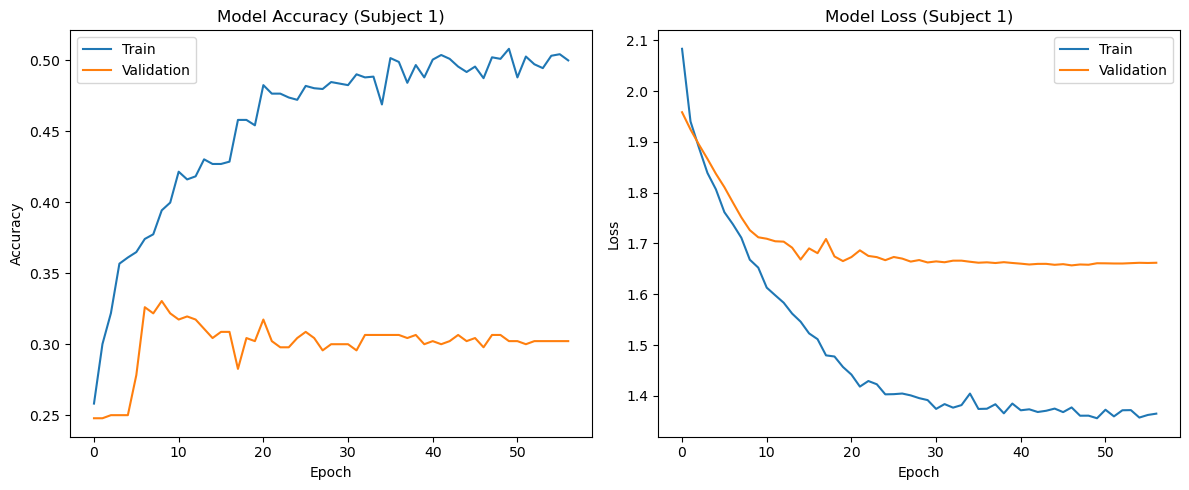

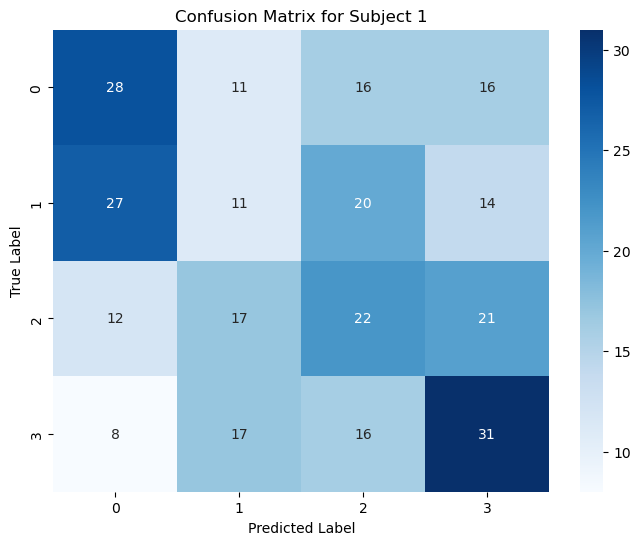

Processing test subject 2/9
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 33s 482ms/step - accuracy: 0.2584 - loss: 2.3717 - val_accuracy: 0.2457 - val_loss: 1.9621 - learning_rate: 1.0000e-04
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 474ms/step - accuracy: 0.3107 - loss: 1.9334 - val_accuracy: 0.2500 - val_loss: 1.9305 - learning_rate: 1.0000e-04
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 479ms/step - accuracy: 0.3613 - loss: 1.8734 - val_accuracy: 0.2478 - val_loss: 1.9016 - learning_rate: 1.0000e-04
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 482ms/step - accuracy: 0.3513 - loss: 1.8429 - val_accuracy: 0.2652 - val_loss: 1.8743 - learning_rate: 1.0000e-04
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 496ms/step - accuracy: 0.3877 - loss: 1.7984 - val_accuracy: 0.2696 - val_loss: 1.8459 - learning_rate: 1.0000e-04
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 491ms/step - accuracy: 0.4028 - loss: 1.7596 - val_accuracy: 0.2978 - val_loss: 1.8163 - learning_rate: 1.0000e-04
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 485ms/ste

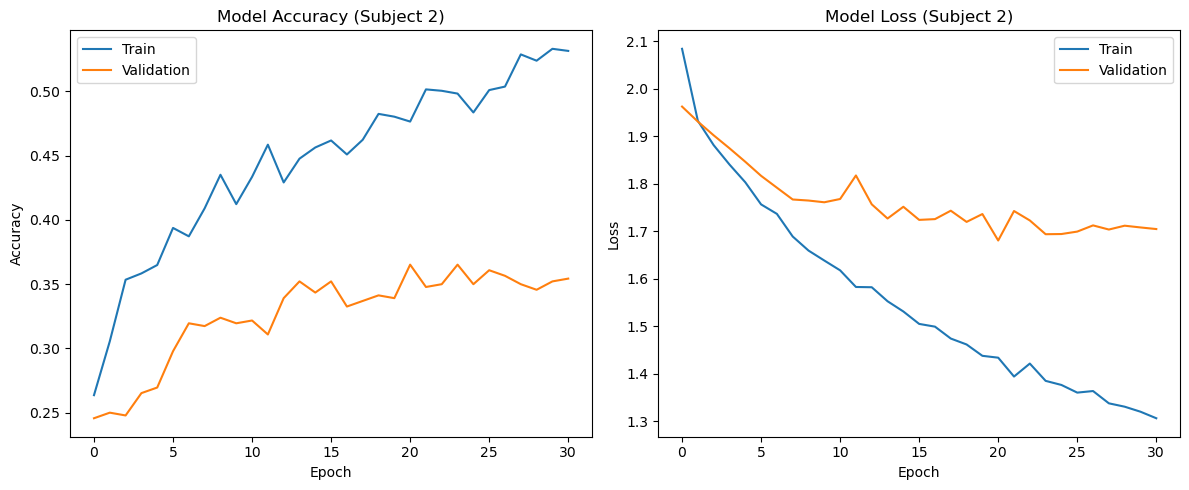

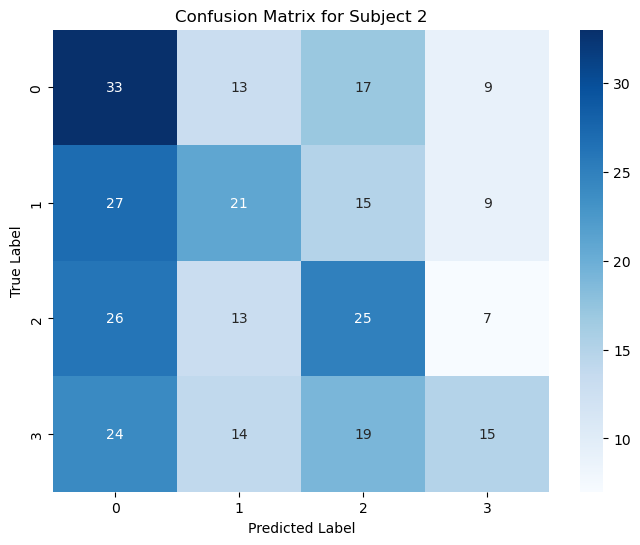

Processing test subject 3/9
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 486ms/step - accuracy: 0.2518 - loss: 2.3473 - val_accuracy: 0.2478 - val_loss: 1.9567 - learning_rate: 1.0000e-04
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 497ms/step - accuracy: 0.3128 - loss: 1.9278 - val_accuracy: 0.2478 - val_loss: 1.9212 - learning_rate: 1.0000e-04
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 491ms/step - accuracy: 0.3238 - loss: 1.9003 - val_accuracy: 0.2478 - val_loss: 1.8875 - learning_rate: 1.0000e-04
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 477ms/step - accuracy: 0.3480 - loss: 1.8441 - val_accuracy: 0.2478 - val_loss: 1.8562 - learning_rate: 1.0000e-04
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 492ms/step - accuracy: 0.3877 - loss: 1.7935 - val_accuracy: 0.2609 - val_loss: 1.8241 - learning_rate: 1.0000e-04
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 488ms/step - accuracy: 0.3835 - loss: 1.7506 - val_accuracy: 0.3304 - val_loss: 1.7839 - learning_rate: 1.0000e-04
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 490ms/ste

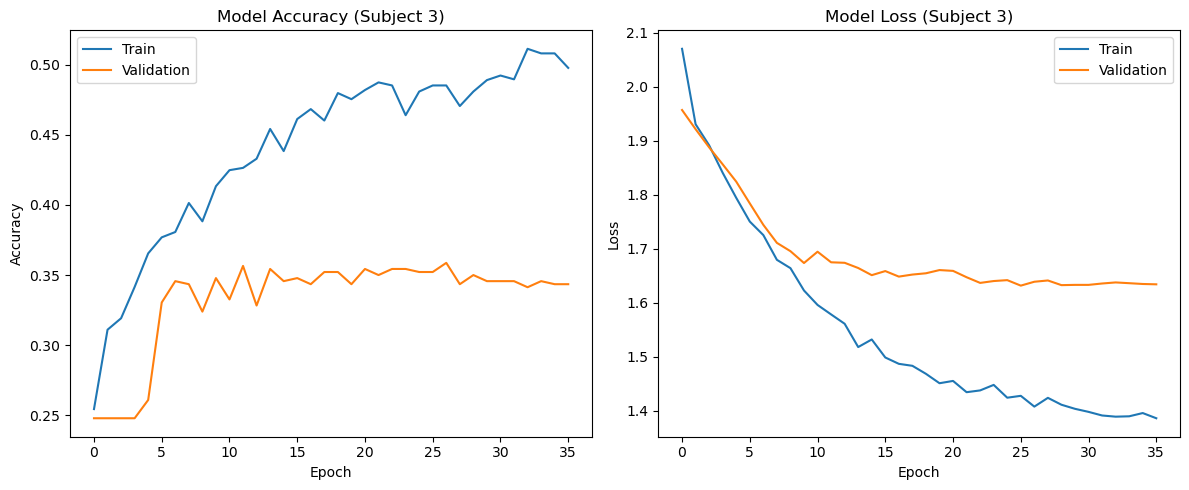

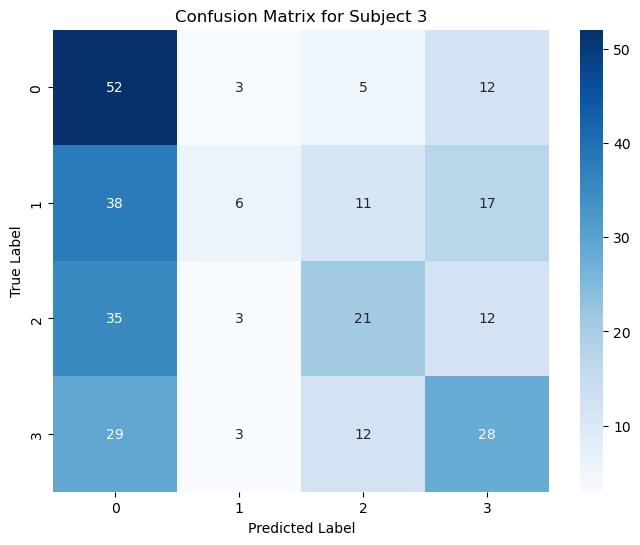

Processing test subject 4/9
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 495ms/step - accuracy: 0.2571 - loss: 2.3705 - val_accuracy: 0.2304 - val_loss: 1.9590 - learning_rate: 1.0000e-04
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 487ms/step - accuracy: 0.3457 - loss: 1.9268 - val_accuracy: 0.2478 - val_loss: 1.9244 - learning_rate: 1.0000e-04
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 489ms/step - accuracy: 0.3480 - loss: 1.8617 - val_accuracy: 0.2478 - val_loss: 1.8938 - learning_rate: 1.0000e-04
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 493ms/step - accuracy: 0.3695 - loss: 1.8327 - val_accuracy: 0.2500 - val_loss: 1.8658 - learning_rate: 1.0000e-04
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 482ms/step - accuracy: 0.3915 - loss: 1.7766 - val_accuracy: 0.2500 - val_loss: 1.8386 - learning_rate: 1.0000e-04
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 488ms/step - accuracy: 0.4012 - loss: 1.7408 - val_accuracy: 0.2978 - val_loss: 1.8042 - learning_rate: 1.0000e-04
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 494ms/ste

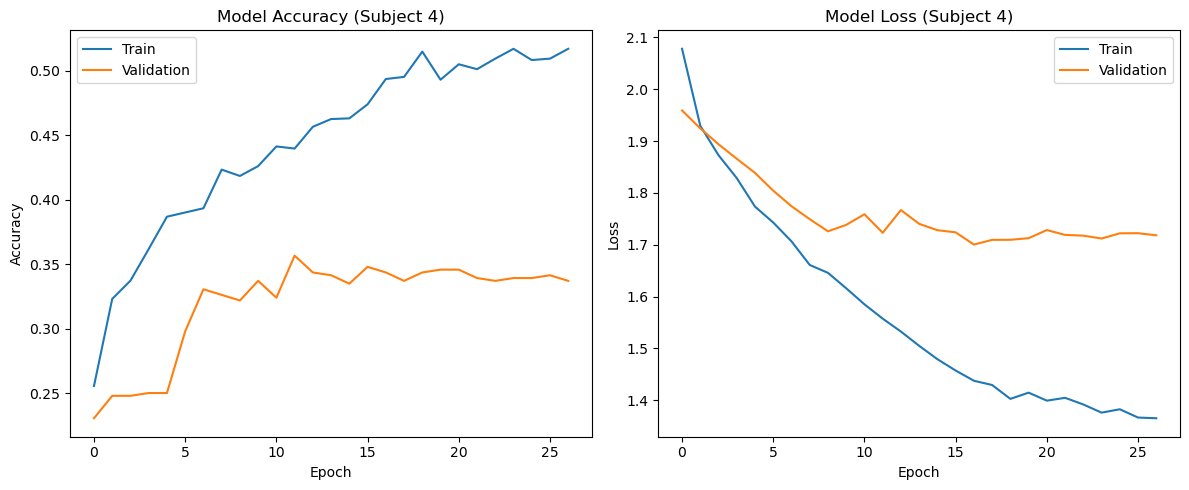

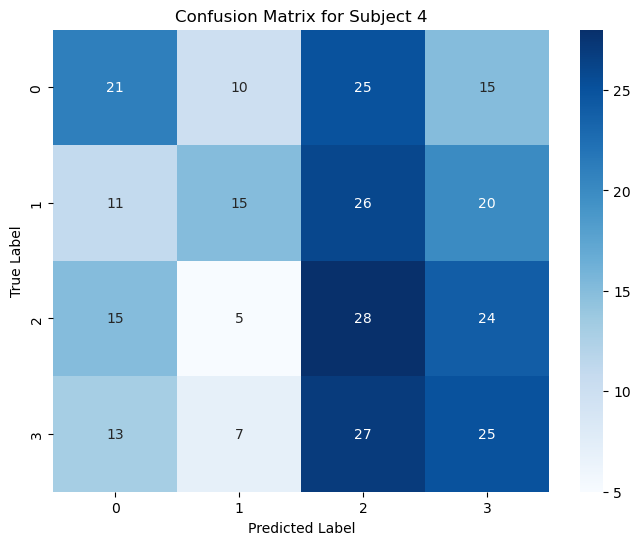

Processing test subject 5/9
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 33s 497ms/step - accuracy: 0.2536 - loss: 2.3522 - val_accuracy: 0.2478 - val_loss: 1.9598 - learning_rate: 1.0000e-04
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 487ms/step - accuracy: 0.3201 - loss: 1.9377 - val_accuracy: 0.2478 - val_loss: 1.9262 - learning_rate: 1.0000e-04
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 486ms/step - accuracy: 0.3231 - loss: 1.8864 - val_accuracy: 0.2478 - val_loss: 1.8955 - learning_rate: 1.0000e-04
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 494ms/step - accuracy: 0.3714 - loss: 1.8209 - val_accuracy: 0.2457 - val_loss: 1.8689 - learning_rate: 1.0000e-04
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 492ms/step - accuracy: 0.3823 - loss: 1.7773 - val_accuracy: 0.2543 - val_loss: 1.8455 - learning_rate: 1.0000e-04
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 480ms/step - accuracy: 0.3961 - loss: 1.7384 - val_accuracy: 0.2957 - val_loss: 1.8136 - learning_rate: 1.0000e-04
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 480ms/ste

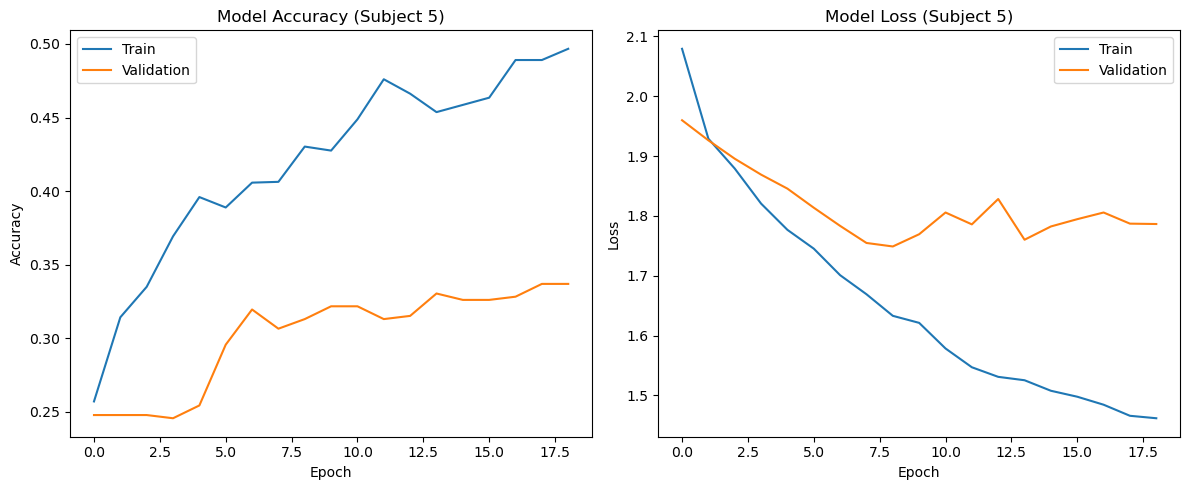

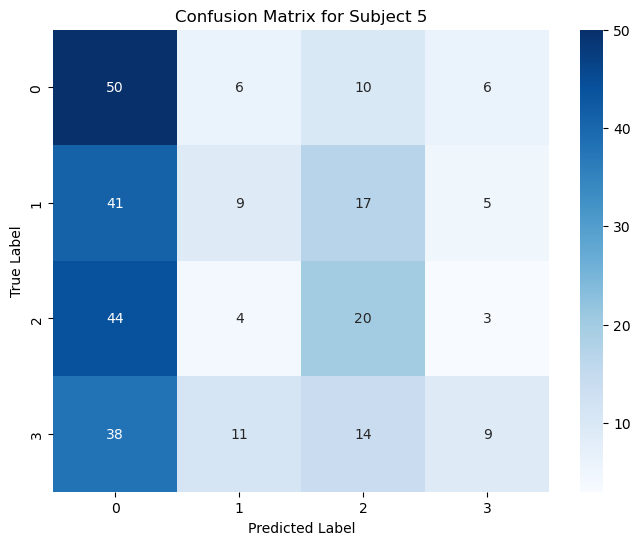

Processing test subject 6/9
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 488ms/step - accuracy: 0.2528 - loss: 2.3579 - val_accuracy: 0.2478 - val_loss: 1.9561 - learning_rate: 1.0000e-04
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 484ms/step - accuracy: 0.3431 - loss: 1.9127 - val_accuracy: 0.2478 - val_loss: 1.9214 - learning_rate: 1.0000e-04
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 492ms/step - accuracy: 0.3314 - loss: 1.8773 - val_accuracy: 0.2522 - val_loss: 1.8896 - learning_rate: 1.0000e-04
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 482ms/step - accuracy: 0.3619 - loss: 1.8162 - val_accuracy: 0.2543 - val_loss: 1.8617 - learning_rate: 1.0000e-04
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 479ms/step - accuracy: 0.3967 - loss: 1.7735 - val_accuracy: 0.2674 - val_loss: 1.8317 - learning_rate: 1.0000e-04
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 42s 491ms/step - accuracy: 0.3997 - loss: 1.7227 - val_accuracy: 0.2848 - val_loss: 1.8003 - learning_rate: 1.0000e-04
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 482ms/ste

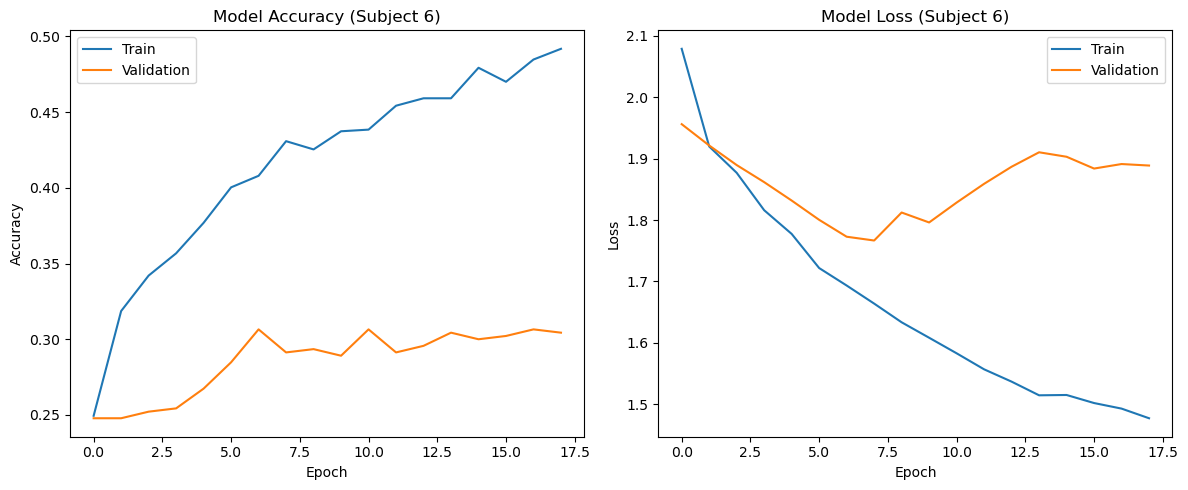

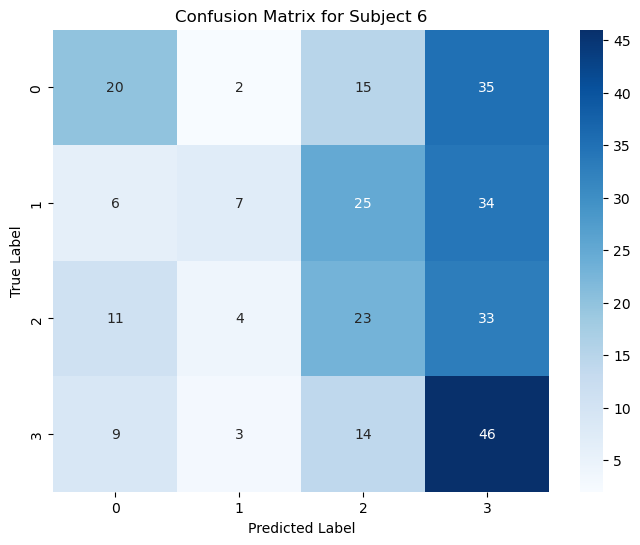

Processing test subject 7/9
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 514ms/step - accuracy: 0.2396 - loss: 2.3932 - val_accuracy: 0.2478 - val_loss: 1.9602 - learning_rate: 1.0000e-04
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 494ms/step - accuracy: 0.3184 - loss: 1.9369 - val_accuracy: 0.2478 - val_loss: 1.9269 - learning_rate: 1.0000e-04
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 485ms/step - accuracy: 0.3311 - loss: 1.8830 - val_accuracy: 0.2500 - val_loss: 1.8964 - learning_rate: 1.0000e-04
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 484ms/step - accuracy: 0.3442 - loss: 1.8408 - val_accuracy: 0.2543 - val_loss: 1.8677 - learning_rate: 1.0000e-04
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 494ms/step - accuracy: 0.3628 - loss: 1.7883 - val_accuracy: 0.2543 - val_loss: 1.8405 - learning_rate: 1.0000e-04
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 486ms/step - accuracy: 0.3892 - loss: 1.7523 - val_accuracy: 0.2652 - val_loss: 1.8157 - learning_rate: 1.0000e-04
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 486ms/ste

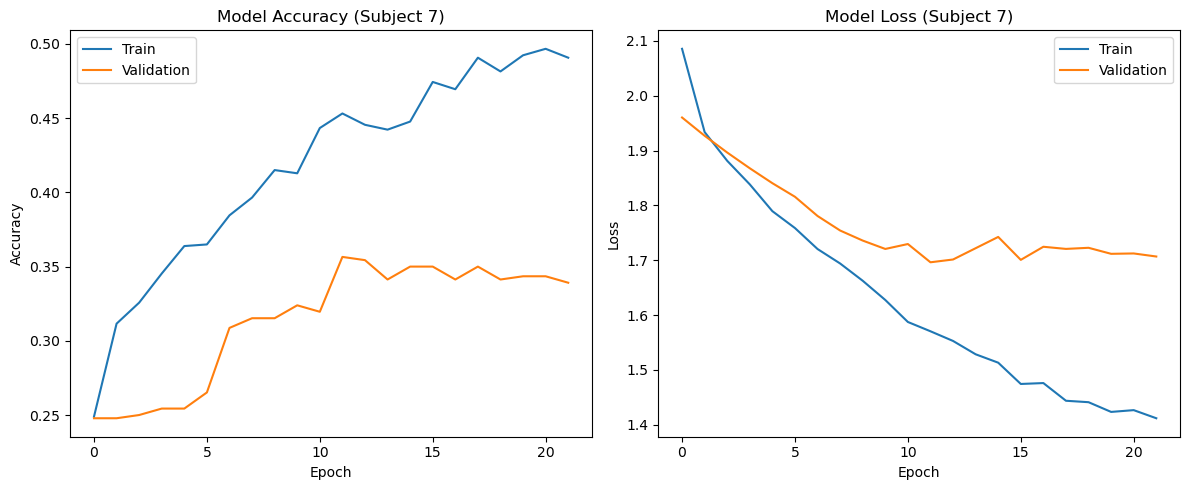

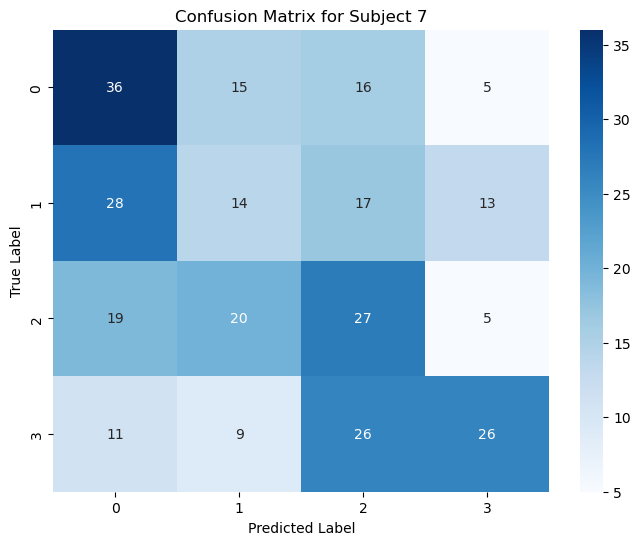

Processing test subject 8/9
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 33s 496ms/step - accuracy: 0.2702 - loss: 2.3534 - val_accuracy: 0.2630 - val_loss: 1.9582 - learning_rate: 1.0000e-04
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 490ms/step - accuracy: 0.3111 - loss: 1.9271 - val_accuracy: 0.2587 - val_loss: 1.9248 - learning_rate: 1.0000e-04
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 487ms/step - accuracy: 0.3340 - loss: 1.8778 - val_accuracy: 0.2630 - val_loss: 1.8939 - learning_rate: 1.0000e-04
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 500ms/step - accuracy: 0.3505 - loss: 1.8322 - val_accuracy: 0.2739 - val_loss: 1.8667 - learning_rate: 1.0000e-04
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 499ms/step - accuracy: 0.3847 - loss: 1.7740 - val_accuracy: 0.2870 - val_loss: 1.8415 - learning_rate: 1.0000e-04
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 485ms/step - accuracy: 0.4078 - loss: 1.7387 - val_accuracy: 0.2783 - val_loss: 1.8173 - learning_rate: 1.0000e-04
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 479ms/ste

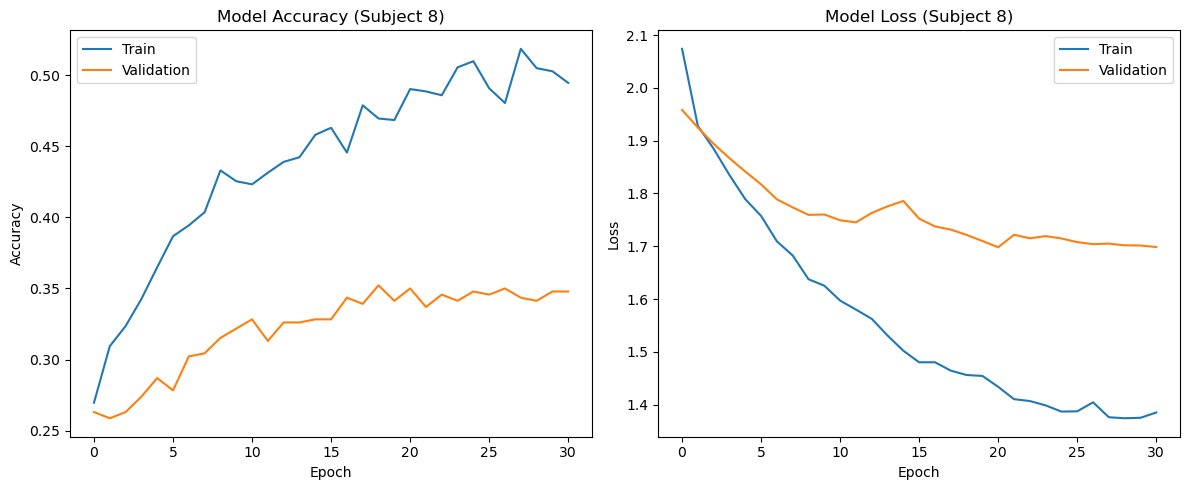

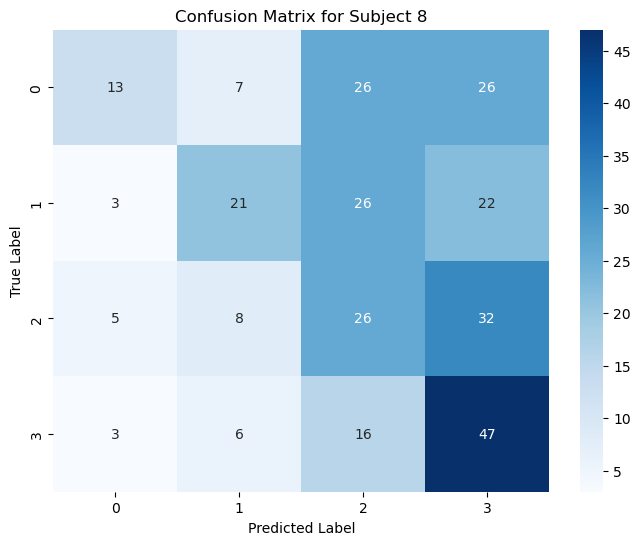

Processing test subject 9/9
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_219439/3099889337.py:44: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 491ms/step - accuracy: 0.2539 - loss: 2.3664 - val_accuracy: 0.2457 - val_loss: 1.9568 - learning_rate: 1.0000e-04
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 477ms/step - accuracy: 0.2954 - loss: 1.9428 - val_accuracy: 0.2413 - val_loss: 1.9202 - learning_rate: 1.0000e-04
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 489ms/step - accuracy: 0.3133 - loss: 1.8935 - val_accuracy: 0.2413 - val_loss: 1.8875 - learning_rate: 1.0000e-04
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 481ms/step - accuracy: 0.3537 - loss: 1.8265 - val_accuracy: 0.2391 - val_loss: 1.8587 - learning_rate: 1.0000e-04
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 488ms/step - accuracy: 0.3951 - loss: 1.7821 - val_accuracy: 0.2435 - val_loss: 1.8315 - learning_rate: 1.0000e-04
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 486ms/step - accuracy: 0.3903 - loss: 1.7401 - val_accuracy: 0.2652 - val_loss: 1.8030 - learning_rate: 1.0000e-04
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 491ms/ste

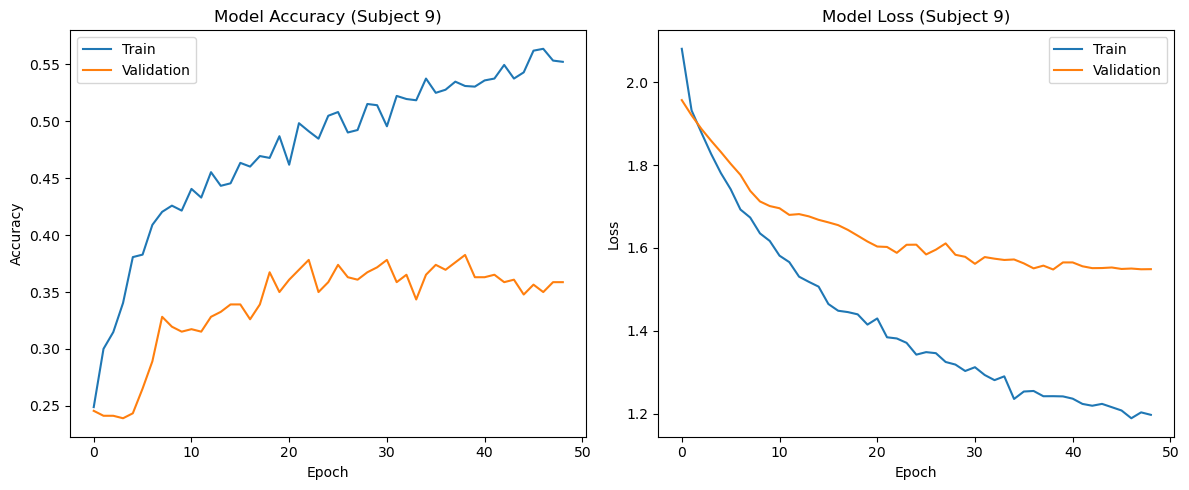

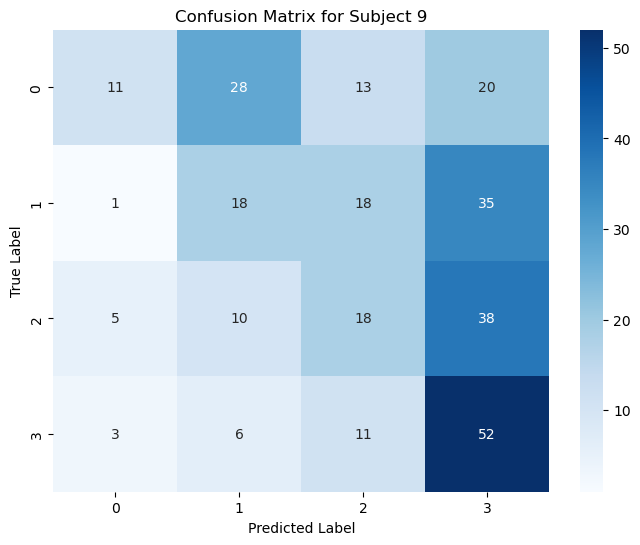

Cross-subject validation complete.


In [66]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import mne

# Define paths
gdf_dir = '/home/jovyan/BCICIV_2a_gdf'
output_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_cross_subject'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of subject files
subjects = ['A01T.gdf', 'A02T.gdf', 'A03T.gdf', 'A04T.gdf', 'A05T.gdf', 'A06T.gdf', 'A07T.gdf', 'A08T.gdf', 'A09T.gdf']

# Event IDs for the classes
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
tmin, tmax = 1.5, 6  # 4.5 seconds epochs starting at 1.5s

# Function to load and preprocess data
def load_data_from_subjects(subjects, data_dir):
    all_data = []
    all_labels = []
    for subject in subjects:
        gdf_path = os.path.join(gdf_dir, subject)
        
        # Load the BCI-IV 2a dataset
        raw = mne.io.read_raw_gdf(gdf_path, preload=True)

        # Remove the last three channels (EOG-left, EOG-central, and EOG-right)
        raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

        # Extract epochs for each class using provided event IDs
        events, _ = mne.events_from_annotations(raw, event_id=event_id)

        # Creating epochs for each class
        epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True)
        data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)

        # Standardize each channel
        data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

        # Save epochs to list
        for i, epoch_data in enumerate(data):
            label = epochs.events[i, -1] - 7
            all_data.append(epoch_data)
            all_labels.append(label)
    
    return np.array(all_data), np.array(all_labels)

# Load all data
all_data, all_labels = load_data_from_subjects(subjects, output_dir)

# Cross-subject validation
for test_subject_idx in range(len(subjects)):
    print(f"Processing test subject {test_subject_idx + 1}/{len(subjects)}")

    # Prepare test data
    test_subject = subjects[test_subject_idx]
    test_subject_data, test_subject_labels = load_data_from_subjects([test_subject], output_dir)
    
    # Prepare training data
    train_subjects = [s for i, s in enumerate(subjects) if i != test_subject_idx]
    train_data, train_labels = load_data_from_subjects(train_subjects, output_dir)

    # Standardize data
    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
    test_subject_data = scaler.transform(test_subject_data.reshape(-1, test_subject_data.shape[-1])).reshape(test_subject_data.shape)

    # Data Augmentation
    def augment_data(data):
        augmented_data = []
        for epoch in data:
            shift = np.random.randint(epoch.shape[1] // 10)
            if np.random.rand() > 0.5:
                epoch = np.roll(epoch, shift, axis=1)
            else:
                epoch = np.roll(epoch, -shift, axis=1)
            noise = np.random.normal(0, 0.1, epoch.shape)
            epoch += noise
            jitter = np.random.normal(0, 0.01, epoch.shape)
            epoch += jitter
            augmented_data.append(epoch)
        return np.array(augmented_data)

    train_data = augment_data(train_data)

    # Define model
    C = train_data.shape[1]  # Number of channels
    T = train_data.shape[2]  # Number of samples
    F1 = 32  # Number of temporal filters in EEGnet
    F2 = 64  # Number of pointwise filters in EEGnet
    D = 4  # Depth multiplier
    KE = 64  # Kernel size in EEGnet first convolution
    KT = 32  # Kernel size in TCN block
    pe = 0.4  # Dropout rate in EEGnet
    pt = 0.4  # Dropout rate in TCN block
    FT = 32  # Filters in TCN block

    def create_model(input_shape):
        inputs = tf.keras.Input(shape=input_shape)
        x = tf.keras.layers.Conv2D(F1, (1, KE), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='C1')(inputs)
        x = tf.keras.layers.BatchNormalization(name='BN1')(x)
        x = tf.keras.layers.DepthwiseConv2D((C, 1), depth_multiplier=D, padding='valid', depthwise_constraint=tf.keras.constraints.max_norm(1.), name='C2')(x)
        x = tf.keras.layers.BatchNormalization(name='BN2')(x)
        x = tf.keras.layers.ELU(name='A1')(x)
        x = tf.keras.layers.AveragePooling2D((1, 8), name='P1')(x)
        x = tf.keras.layers.Dropout(pe, name='D1')(x)
        x = tf.keras.layers.SeparableConv2D(F2, (1, 16), padding='same', name='C3')(x)
        x = tf.keras.layers.BatchNormalization(name='B2')(x)
        x = tf.keras.layers.ELU(name='A2')(x)
        x = tf.keras.layers.AveragePooling2D((1, 8), name='P2')(x)
        x = tf.keras.layers.Dropout(pe, name='D2')(x)
        tcn = tf.keras.layers.Conv2D(FT, (1, KT), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='TC')(x)
        tcn = tf.keras.layers.Dropout(pt)(tcn)
        tcn = tf.keras.layers.ELU()(tcn)
        x = tf.keras.layers.Concatenate(name='CON1')([x, tcn])
        fc1 = tf.keras.layers.Flatten(name='FC1')(x)
        x = tf.keras.layers.Dense(256, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_constraint=tf.keras.constraints.max_norm(0.25))(fc1)
        x = tf.keras.layers.Dropout(0.5)(x)
        outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
        model = tf.keras.Model(inputs, outputs)
        return model

    # Initialize and compile the model
    input_shape = (C, T, 1)
    model = create_model(input_shape)
    model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Callbacks
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_subj_{test_subject_idx + 1}.keras', monitor='val_loss', save_best_only=True)

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_labels),
        y=train_labels
    )
    class_weights = dict(enumerate(class_weights_array))

    # Train the model
    num_epochs = 200
    batch_size = 32
    history = model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size,
                        validation_split=0.2, callbacks=[lr_scheduler, early_stopping, model_checkpoint],
                        class_weight=class_weights)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_subject_data, test_subject_labels, verbose=2)
    print(f'Test Accuracy for subject {test_subject_idx + 1}: {test_acc * 100:.2f}%')

    # Make predictions
    predictions = model.predict(test_subject_data)
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(test_subject_labels, predicted_labels)
    kappa_score = cohen_kappa_score(test_subject_labels, predicted_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(test_subject_labels, predicted_labels, average='weighted')

    print(f'Test Accuracy (calculated) for subject {test_subject_idx + 1}: {accuracy * 100:.2f}%')
    print(f"Cohen's κ-score for subject {test_subject_idx + 1}: {kappa_score:.2f}")
    print(f'Precision for subject {test_subject_idx + 1}: {precision:.2f}')
    print(f'Recall for subject {test_subject_idx + 1}: {recall:.2f}')
    print(f'F1-score for subject {test_subject_idx + 1}: {f1:.2f}')

    # Print the number of parameters
    num_params = model.count_params()
    print(f'Number of parameters for subject {test_subject_idx + 1}: {num_params}')

    # Plot learning curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Model Accuracy (Subject {test_subject_idx + 1})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'Model Loss (Subject {test_subject_idx + 1})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot confusion matrix
    cm = confusion_matrix(test_subject_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(4), yticklabels=np.arange(4))
    plt.title(f'Confusion Matrix for Subject {test_subject_idx + 1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

print("Cross-subject validation complete.")


In [70]:
import os
import json
import time
import warnings
import math
from math import pi
import argparse

import pennylane as qml
import numpy as np

import mne
import scipy.io as sio
from scipy import signal
import pywt
from mne.decoding import CSP 
from sklearn import preprocessing
from scipy.stats import kurtosis, skew

from spectrum import *


class FeatureExtractor:
    def __init__(self, **kwargs):
    #def __init__(self, dataset=1, subjects=None, ):
        dataset = kwargs.pop('data', 1) # which dataset to run search on
        self.sfreq = 250
        if dataset == 1:        # BCI competition IV 2b
            self.dataset = 'B'           
        elif dataset == 0:      # BCI competition IV 2a
            self.dataset = 'A'
        elif dataset == 2:      # BCI competition II 3
            self.dataset = 'C'
            self.sfreq = 128
        elif dataset == 3:      # BCI competition III 2
            self.dataset = 'D'
            self.sfreq = 125  
        self.dataset_path = kwargs.pop('dataset_path', None)  # path of dataset
        self.save_path = kwargs.pop('save_path', None)  # path of dataset
        self.n_sub = kwargs.pop('n_sub', 9) # number of subjects to evaluate
        self.subjects = kwargs.pop('sub_list', list(range(self.n_sub))) # list of subjects to evaluate
        self.subjects = self.subjects if self.subjects is not None else list(range(self.n_sub))
        self.n_sub = len(self.subjects) if len(self.subjects) != self.n_sub else self.n_sub
        self.feat_set = kwargs.pop('feat_set', 0) # number of subjects to evaluate

        # Signal preprocessing
        self.sample = kwargs.pop('sample_freq', None) # frequency to perform downsample (100 Hz)
        self.data_aug = True if kwargs.pop('data_aug', 'false').lower() == 'true' else False  # whether or not perform data augmentation by applying sliding windows
        self.n_hop = kwargs.pop('n_hop', 0.1) # size of jump between windows
        self.window_sz = kwargs.pop('window_sz', 2) # window size
        self.low_freq = kwargs.pop('low_freq', 0.5) # low frequency to filter signal
        self.high_freq = kwargs.pop('high_freq', 35) # high frequency to filter signal
        
        # Subband extraction
        self.wavelet = True if kwargs.pop('wavelet', 'true').lower() == 'true' else False  # whether or not perform Wavelet Packet Decomposition.
        self.f_bank = True if kwargs.pop('f_bank', 'false').lower() == 'true' else False  # whether or not perform filter bank
        self.wpd_noc = True if kwargs.pop('wpd_noc', 'false').lower() == 'true' else False  # whether perform WPD for each channel or all channels
        self.n_bands = kwargs.pop('n_bands', 8) # number of subbands
        self.low_frequencies = kwargs.pop('low_frequencies', np.arange(4, 37, 1)) # list of low frequencies for filter bank
        self.high_frequencies = kwargs.pop('high_frequencies', np.arange(8, 41, 1)) # list of high frequencies for filter bank
        self.low_frequencies = np.array(self.low_frequencies) if self.low_frequencies is not None else np.arange(4, 37, 1)
        self.high_frequencies = np.array(self.high_frequencies) if self.high_frequencies is not None else np.arange(8, 41, 1)

        # Feature extraction
        self.active_features = kwargs.pop('feature_list', None) # array of features to extract
        if self.active_features is None:
            # First 13 are for Wavelet features. First 0-11 for each subband
            # 0: Mean Absolute Value
            # 1: Root Mean Square
            # 2: Average amplitude change
            # 3: Subband energy
            # 4: Mean Energy
            # 5: Volatility index
            # 6: Average nonlinear energy (ANE)
            # 7: Spectral entropy (SE)
            # 8: Standard deviation
            # 9: Variance
            # 10: Subband Skewness
            # 11: Subband Kurtosis
            # 12: Energy_ratio
            # Between channels
            # 13: Hjorth Mobility and Complexity
            # 14: Kurtosis
            # 15: 2nd Difference Mean
            # 16: Coefficient of variation
            # 17: Skewness
            # 18: 1st Difference Mean
            # 19: FFT features(Max Power)
            # 20: Shanon Entropy 
            # 21: Autoregression model- Burg Algorithm
            self.active_features = np.zeros(22)
            self.active_features[0] = 1
            self.active_features[1] = 1
            self.active_features[2] = 1
            self.active_features[6] = 1
            self.active_features[8] = 1
            self.active_features[12] = 1
            self.active_features[13] = 1
            self.active_features[19] = 1
            self.active_features[21] = 1

        if self.dataset_path is None:
            #self.dataset_path = '../BCIC_data/'
            self.dataset_path = '/data/BCIC_data/'
        if self.save_path is None:
            self.save_path = self.dataset_path + 'Extracted_Features'
        if not os.path.exists(self.save_path):
            os.makedirs(self.save_path)

    def downsample(self, x_data, sample_freq = 128):
        q = self.sfreq/sample_freq
        X_sampled = mne.filter.resample(x_data, down=q, npad='auto')
        return X_sampled
    
    def sliding_window(self, x_data, y_data, fs):
        duration = x_data.shape[2]/fs
        windows = np.arange(0,duration-self.window_sz+self.n_hop,self.n_hop)
        n_windows = windows.shape[0]
        X_aug = np.zeros((x_data.shape[0]*n_windows, x_data.shape[1], int(self.window_sz*fs)))
        y_aug = np.zeros((y_data.shape[0]*n_windows, 1))
        for i in range(x_data.shape[0]):
            for j in range(x_data.shape[1]):
                for idx, w in enumerate(windows):
                    X_aug[(i*n_windows)+idx,j,:] = x_data[i,j,int(w*fs):int((w+self.window_sz)*fs)]
                    y_aug[(i*n_windows)+idx] = y_data[i]
        return X_aug, y_aug
    
    def filter_data(self, x_data, fs, low, high):
        iir_params = dict(order=6, ftype='butter')
        filt = mne.filter.create_filter(x_data, fs, l_freq=low, h_freq=high,
                                        method='iir', iir_params=iir_params, verbose=False)

        x_steep = signal.sosfiltfilt(filt['sos'], x_data)
        return x_steep
    
    def wpd(self, x_data): 
        coeffs = pywt.WaveletPacket(x_data,'db4',mode='symmetric',maxlevel=6)
        return coeffs
             
    def feature_bands(self, x_data, level=6, start=1, n_bands=8):
        all_bands = []
    
        for i in range(x_data.shape[0]):
            bands = []
            for j in range(x_data.shape[1]):
                subbands = []
                C = self.wpd(x_data[i,j,:]) 
                wpd_bands = C.get_level(level, 'natural')
                for b in range(start,start+n_bands):
                    subbands.append(wpd_bands[b].data)
                bands.append(subbands)
            all_bands.append(bands)
        
        return np.array(all_bands)
    
    def filter_bank(self, x_data, fs):
        filtered_X = np.zeros((x_data.shape[0], x_data.shape[1], self.low_frequencies.shape[0], x_data.shape[2]))
        for i in range(self.low_frequencies.shape[0]):
            filtered_X[:,:,i] = self.filter_data(x_data, fs, self.low_frequencies[i], self.high_frequencies[i])
        return filtered_X
    
    # Hjorth Parameters
    def hjorth(self, xV):                                             
        hjorth_activity = np.zeros(xV.shape[0])
        hjorth_mobility = np.zeros(xV.shape[0])
        hjorth_diffmobility = np.zeros(xV.shape[0])
        hjorth_complexity = np.zeros(xV.shape[0])
        diff_xV = np.diff(xV)
        diff_dxV = np.diff(diff_xV)
        for k in range(xV.shape[0]):
            hjorth_activity[k] = np.var(xV[k,:])
            hjorth_mobility[k] = np.sqrt(np.var(diff_xV[k,:])/hjorth_activity[k])
            hjorth_diffmobility[k] = np.sqrt(np.var(diff_dxV[k,:])/np.var(diff_xV[k,:]))
            hjorth_complexity[k] = hjorth_diffmobility[k]/hjorth_mobility[k]
        return np.mean(hjorth_mobility), np.mean(hjorth_complexity) 
        #return np.mean(hjorth_activity), np.mean(hjorth_mobility), np.mean(hjorth_complexity) 
    
    # Kurtosis
    def my_kurtosis(self, x_data):
        output = np.zeros(x_data.shape[0]) # Initializing the output array with zeros (length = 14)
        for i in range(x_data.shape[0]):
            output[i] = kurtosis(x_data[i], fisher=False)
        return np.mean(output)
    
    # 2nd Diff Mean
    def secDiffMean(self, x_data):
        output = np.zeros(x_data.shape[0]) # Initializing the output array with zeros (length = 14)
        temp1 = np.zeros(x_data.shape[1]-1) # To store the 1st Diffs
        for k in range(x_data.shape[0]):
            t = 0.0
            for j in range(x_data.shape[1]-1):
                temp1[j] = abs(x_data[k,j+1]-x_data[k,j]) # Obtaining the 1st Diffs
            for j in range(x_data.shape[1]-2):
                t += abs(temp1[j+1]-temp1[j]) # Summing the 2nd Diffs
            output[k] = t/(x_data.shape[1]-2) # Calculating the mean of the 2nd Diffs
        return np.mean(output)
    
    # Coefficient of variation
    def coeff_var(self, x_data):
        output = np.zeros(x_data.shape[0]) #Initializing the output array with zeros
    
        for i in range(x_data.shape[0]):
            output[i] = np.std(x_data[i,:])/np.mean(x_data[i,:]) #computing coefficient of variation
        return np.mean(output)
    
    # Skewness
    def skewness(self, x_data):
        skew_array = np.zeros(x_data.shape[0]) 
   
        for i in range(x_data.shape[0]):
            skew_array[i] = skew(x_data[i,:],axis=0,bias=True)
        return np.mean(skew_array)
    
    # 1st Difference Mean
    def first_diff_mean(self, x_data):
        diff_mean_array = np.zeros(x_data.shape[0]) #Initialinling the array as all 0s

        for i in range(x_data.shape[0]):
            sum=0.0 
            for j in range(x_data.shape[1]-1):
                sum += abs(x_data[i,j+1]-x_data[i,j]) # Obtaining the 1st Diffs
            diff_mean_array[i]=sum/(x_data.shape[1]-1)

        return np.mean(diff_mean_array)
    
    # FFT features(Max Power)
    def maxPwelch(self, x_data, Fs):
        BandF = [4, 8, 13, 30]
        PMax = np.zeros([x_data.shape[0],(len(BandF)-1)])
    
        for j in range(x_data.shape[0]):
            f,Psd = signal.welch(x_data[j,:], Fs)
        
            for i in range(len(BandF)-1):
                fr = np.where((f>BandF[i]) & (f<=BandF[i+1]))
                PMax[j,i] = np.max(Psd[fr])
        feature_vec = []
        for i in range(len(BandF)-1):
            feature_vec.append(np.mean(PMax[:,i]))
        return np.array(feature_vec)

    
    # Shanon Entropy and Entropy Spectral
    def entropy(self, y_data): # Shanon Entropy
        """ Computes entropy of 0-1 vector. """
        counts = np.bincount(y_data)
        probs = counts[np.nonzero(counts)] / y_data.shape[0]
        n_classes = len(probs)

        if n_classes <= 1:
            return 0
        return - np.sum(probs * np.log(probs)) / np.log(n_classes)

    # Autoregression model- Burg Algorithm
    def autogressiveModelParametersBurg(self, x_data):
        feature = []
        feature1 = []
        model_order = 3
        for i in range(x_data.shape[0]):
            AR, rho, ref = arburg(x_data[i], model_order)
            feature.append(AR)
        for j in range(x_data.shape[0]):
            for i in range(model_order):
                feature1.append(feature[j][i])

        return np.array(feature1)
    
    # Energy ratio between adjacent subbands
    def energy_ratio(self, x_data):
        e_vector = np.zeros(x_data.shape[0]*(x_data.shape[1]-1))
        k = 0
        for i in range(x_data.shape[0]):
            for j in range(x_data.shape[1]-1):
                e_vector[k] = np.sum(np.square(x_data[i,j,:])) / np.sum(np.square(x_data[i,j+1,:]))
                k += 1
        return e_vector
    
    def energy_ratio_2(self, x_data):
        e_vector = np.zeros(x_data.shape[1]-1)
   
        for k in range(x_data.shape[1]-1):
            e_vector[k] = np.sum(np.square(x_data[k,:])) / np.sum(np.square(x_data[k+1,:]))

        return e_vector

    def extract_subband_features(self, x_data):
        xsize = x_data.shape[0]
        feat_vec = []
        #F1: Mean Absolute Value
        if self.active_features[0] == 1:
            feat_vec.append(np.mean(np.abs(x_data)))

        #F2: Root Mean Square
        if self.active_features[1] == 1:
            feat_vec.append(np.sqrt(np.mean(np.square(x_data))))

        #F3: Average amplitude change
        if self.active_features[2] == 1:
            temp = 0
            for i in range(xsize-1):
                temp=temp+abs(x_data[i+1]-x_data[i])
            feat_vec.append(temp/xsize)

        #F4: Subband energy
        if self.active_features[3] == 1:
            feat_vec.append(np.sum(np.square(x_data)))

        #F5: Mean Energy
        if self.active_features[4] == 1:
            feat_vec.append(np.mean(np.square(x_data)))
    
        #F6: Volatility index
        if self.active_features[5] == 1:
            temp = 0
            for i in range(xsize-1):
                temp=temp+abs(x_data[i]-x_data[i+1])
            feat_vec.append(temp/(xsize-1))
    
        #F7: Average nonlinear energy (ANE)
        if self.active_features[6] == 1:
            temp=0
            for i in range(1,xsize-1):
                temp=temp+((x_data[i]**2)-(x_data[i+1]*x_data[i-1]))
            feat_vec.append(temp/xsize-2)
    
        #F8: Spectral entropy (SE)
        if self.active_features[7] == 1:
            feat_vec.append(np.sum(np.square(x_data) * np.log(np.square(x_data))))

        #F9: Standard deviation
        if self.active_features[8] == 1:
            feat_vec.append(np.std(x_data))

        #F10: Variance
        if self.active_features[9] == 1:
            feat_vec.append(np.var(x_data))

        #F11: Skewness
        if self.active_features[10] == 1:
            feat_vec.append(skew(x_data,axis=0,bias=True))

        #F12: Kurtosis
        if self.active_features[11] == 1:
            feat_vec.append(kurtosis(x_data, fisher=False))
        
        return np.transpose(np.array(feat_vec)).squeeze()

    def wavelet_features(self, x_data):
        w_features = []
        if self.wavelet:
            wavelet_bands = self.feature_bands(x_data, level=6, n_bands=self.n_bands)
        elif self.f_bank:
            wavelet_bands = self.filter_bank(x_data, self.sfreq)
        else:
            return w_features
        
        for i in range(wavelet_bands.shape[0]):            #trials
            trial_vec = []
            for j in range(wavelet_bands.shape[1]):        # channels
                for k in range(wavelet_bands.shape[2]):    #subbands
                   trial_vec = np.hstack((trial_vec, self.extract_subband_features(wavelet_bands[i,j,k])))
            if self.active_features[12] == 1:
                trial_vec = np.hstack((trial_vec, self.energy_ratio(wavelet_bands[i])))
            w_features.append(trial_vec)
        return np.array(w_features)

    def get_features(self, x_data, y_data, fs):
        feature_vector = []
        w_vector = self.wavelet_features(x_data)

        for i in range(x_data.shape[0]):            #trials
            trial_vec = []
            if self.wavelet or self.f_bank:
                trial_vec = np.hstack((trial_vec, w_vector[i]))
            if self.active_features[13] == 1:
                trial_vec = np.hstack((trial_vec, self.hjorth(x_data[i])))
            if self.active_features[14] == 1:
                trial_vec = np.hstack((trial_vec, self.my_kurtosis(x_data[i])))
            if self.active_features[15] == 1:
                trial_vec = np.hstack((trial_vec, self.secDiffMean(x_data[i])))
            if self.active_features[16] == 1:
                trial_vec = np.hstack((trial_vec, self.coeff_var(x_data[i])))
            if self.active_features[17] == 1:
                trial_vec = np.hstack((trial_vec, self.skewness(x_data[i])))
            if self.active_features[18] == 1:
                trial_vec = np.hstack((trial_vec, self.first_diff_mean(x_data[i])))
            if self.active_features[19] == 1:
                trial_vec = np.hstack((trial_vec, self.maxPwelch(x_data[i], fs)))
            if self.active_features[20] == 1:
                trial_vec = np.hstack((trial_vec, self.entropy(y_data[i])))
            if self.active_features[21] == 1:
                trial_vec = np.hstack((trial_vec, self.autogressiveModelParametersBurg(x_data[i])))
            feature_vector.append(trial_vec)
        return np.array(feature_vector)

    def get_save_features(self, x_data, y_data, subject, fs):
        features = self.get_features(x_data, y_data, fs)
        print(features.shape)
        mdic = {"input": features, "target": y_data}
        sio.savemat(self.save_path + "/Features_" + self.dataset + "0" + str(subject) + "_" + str(self.feat_set) + ".mat",mdic)  

    def extract_features(self):
        print("Extract features for " + str(self.n_sub) + " subjects on dataset " + self.dataset)
        t_string = ''
        if self.active_features[0] == 1:
            t_string = 'Subband Mean Absolute Value, '
        if self.active_features[1] == 1:
            t_string = t_string + 'Subband Root Mean Square, ' 
        if self.active_features[2] == 1:
            t_string = t_string + 'Subband Average amplitude change, '
        if self.active_features[3] == 1:
            t_string = t_string + 'Subband energy, '
        if self.active_features[4] == 1:
            t_string = t_string + 'Subband Mean Energy, '
        if self.active_features[5] == 1:
            t_string = t_string + 'Subband Volatility index, '
        if self.active_features[6] == 1:
            t_string = t_string + 'Subband Average nonlinear energy (ANE), '
        if self.active_features[7] == 1:
            t_string = t_string + 'Subband Spectral entropy (SE), '
        if self.active_features[8] == 1:
            t_string = t_string + 'Subband Standard deviation, '
        if self.active_features[9] == 1:
            t_string = t_string + 'Subband Variance, ' 
        if self.active_features[10] == 1:
            t_string = t_string + 'Subband Skewness, '
        if self.active_features[11] == 1:
            t_string = t_string + 'Subband Kurtosis, '
        if self.active_features[12] == 1:
            t_string = t_string + 'Energy_ratio between subbands, '
        if self.active_features[13] == 1:
            t_string = t_string + 'Hjorth parameters, '
        if self.active_features[14] == 1:
            t_string = t_string + 'Kurtosis, '
        if self.active_features[15] == 1:
            t_string = t_string + '2nd Difference Mean, '
        if self.active_features[16] == 1:
            t_string = t_string + 'Coefficient of variation, '
        if self.active_features[17] == 1:
            t_string = t_string + 'Skewness, '
        if self.active_features[18] == 1:
            t_string = t_string + '1st Difference Mean, '
        if self.active_features[19] == 1:
            t_string = t_string + 'FFT features(Max Power), ' 
        if self.active_features[20] == 1:
            t_string = t_string + 'Shanon Entropy, '
        if self.active_features[21] == 1:
            t_string = t_string + 'Autoregression model- Burg Algorithm, '
        
        t_string = t_string[:-2]
        print("Features to extract: " + t_string)
        fs = self.sfreq if self.sample is None else self.sample
        for idx, sub in enumerate(self.subjects):
            print("Extracting features for subject: " + str(sub+1))
            data = sio.loadmat(self.dataset_path + self.dataset +'0'+str(sub+1)+'.mat')
            X_ = data['input']
            y_ = np.transpose(data['target']).squeeze()
            x_data = X_
            y_data = y_
            
            if self.sample is not None:
                x_data = self.downsample(x_data,self.sample)
            if self.data_aug:
                x_data, y_data = self.sliding_window(x_data, y_, fs)
            if self.f_bank is False:
                x_data = self.filter_data(x_data, fs,self.low_freq, self.high_freq)
            

            self.get_save_features(x_data, y_data, sub+1, fs)
            print("Saved features in: " + self.save_path + "/Features_" + self.dataset + "0" + str(sub+1) + "_" + str(self.feat_set) + ".mat")
             

def main(args):

    feature_extractor = FeatureExtractor(**vars(args))
    feature_extractor.extract_features()
        
    return
                    



if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--dataset', type=int, default=1,
                        help='Dataset. 0: BCIC IV 2a, 1: BCIC IV 2b, 2: BCIC II 3, 3: BCIC III 2')
    parser.add_argument('--dataset_path', type=str, default=None,
                        help='Location of dataset')
    parser.add_argument('--save_path', type=str, default=None,
                        help='Location to save data')
    parser.add_argument('--n_sub', type=int, default=9,
                        help='Set the number of subjects to test')
    parser.add_argument('--sub_list', nargs='*', type=int, default=None,
                        help='Set the subjects to test')
    parser.add_argument('--sample_freq', type=int, default=None,
                        help='Set the frequency for downsampling')
    parser.add_argument('--data_aug', type=str, default='false',
                        help='True for data augmentation using sliding windows')
    parser.add_argument('--n_hop', type=float, default=0.1,
                        help='Size of jump between windows')
    parser.add_argument('--window_sz', type=float, default=2,
                        help='Window width') 
    parser.add_argument('--low_freq', type=float, default=0.5,
                        help='High pass frequency to filter signal')
    parser.add_argument('--high_freq', type=float, default=35,
                        help='Low pass frequency to filter signal') 
    parser.add_argument('--wavelet', type=str, default='true',
                        help='True for wavelet packet decomposition')
    parser.add_argument('--wpd_noc', type=str, default='false',
                        help='WPD all channels')
    parser.add_argument('--f_bank', type=str, default='false',
                        help='True for filter bank')
    parser.add_argument('--n_bands', type=int, default=8,
                        help='Set the number of subbands')
    parser.add_argument('--low_frequencies', nargs='*', type=float, default=None,
                        help='List of high pass frequencies for filter bank')
    parser.add_argument('--high_frequencies', nargs='*', type=float, default=None,
                        help='List of low pass frequencies for filter bank')
    parser.add_argument('--feature_list', nargs='*', type=int, default=None,
                        help='List of features to extract')
    
    parser.add_argument('--feat_set', type=int, default=0,
                        help='Set the number of subjects to test')
    # First 13 are for Wavelet features. First 0-11 for each subband
    # 0: Mean Absolute Value
    # 1: Root Mean Square
    # 2: Average amplitude change
    # 3: Subband energy
    # 4: Mean Energy
    # 5: Volatility index
    # 6: Average nonlinear energy (ANE)
    # 7: Spectral entropy (SE)
    # 8: Standard deviation
    # 9: Variance
    # 10: Skewness
    # 11: Kurtosis
    # 12: Energy_ratio
    # Between channels
    # 13: Hjorth Mobility and Complexity
    # 14: Kurtosis
    # 15: 2nd Difference Mean
    # 16: Coefficient of variation
    # 17: Skewness
    # 18: 1st Difference Mean
    # 19: FFT features(Max Power)
    # 20: Shanon Entropy 
    # 21: Autoregression model- Burg Algorithm

    cfgs = parser.parse_args()
    
    main(cfgs)


usage: ipykernel_launcher.py [-h] [--dataset DATASET]
                             [--dataset_path DATASET_PATH]
                             [--save_path SAVE_PATH] [--n_sub N_SUB]
                             [--sub_list [SUB_LIST ...]]
                             [--sample_freq SAMPLE_FREQ] [--data_aug DATA_AUG]
                             [--n_hop N_HOP] [--window_sz WINDOW_SZ]
                             [--low_freq LOW_FREQ] [--high_freq HIGH_FREQ]
                             [--wavelet WAVELET] [--wpd_noc WPD_NOC]
                             [--f_bank F_BANK] [--n_bands N_BANDS]
                             [--low_frequencies [LOW_FREQUENCIES ...]]
                             [--high_frequencies [HIGH_FREQUENCIES ...]]
                             [--feature_list [FEATURE_LIST ...]]
                             [--feat_set FEAT_SET]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/jovyan/.local/share/jupyter/runtime/kernel-c4c3285e-539d-4545-a6a1-f1a67cb75abc

SystemExit: 2

In [72]:
import scipy.io

# Load the .mat file
data = scipy.io.loadmat('Features_B01_11.mat')

# Extract features and labels
X = data['input']   # Replace 'input' with the correct variable name if different
y = data['target']  # Replace 'target' with the correct variable name if different

# Check the shapes
print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (720, 119)
Labels shape: (1, 720)


In [73]:
# Reshape labels to be a 1D array
y = y.flatten()  # This converts (1, 720) to (720,)
